<center><h1><b>Regresja Logistyczna</b></h1></center>
<hr />
<br />

<b>Iloraz szans - szansa wystąpienia danego zdarzenia - wzór: </b>
<br/>
$$OR = \frac{p}{(1-p)}$$
$$gdzie\: p\: -\: prawdopodobienstwo\: wystapienia\: danego\: zdarzenia$$
<hr />
<br />

<b>Funkcja logitowa - logarytm ilorazu szans - wzór: </b>
$$logit(p) = \log{\frac{p}{(p-1)}}$$
<p>Funkcja logitowa przyjmuje wartości w zakresie od 0 do 1 i przekształca je w wartości z pełnego przedziału liczb rzeczywistych</p>
<br />
$$logit(P(y = 1 | x)) = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=1}^{m}w_ix_i = w^{t}x$$
$$P(y = 1|x) \:-\: prawdopodobienstwo\: warunkowe,\: zgodnie\: z\: ktorym\: dana\: probka\: nalezy\: do\: klasy\: 1\: przy\: znanych\: cechach\: x$$
$$w^{t}x\: - \: calkowite\: pobudzenie\: modelu$$
<hr />
<br />
<b>Odwrotnością funkcji logitowej jest funkcja sigmoidalna</b>
<br />
$$\Phi(z) = \frac{1}{1 + e^{-z}}$$
$$ z\: - \: pobudzenie,\: czyli\: liniowa\: kombinacja\: wag\: z\: cechami\: przykladu\:$$
<br />
<p>Wynik funkcji sigmoidalnej interpretowany jest jako prawdopodobieństwo przynależności danej próbki do klasy 1</p>
<br />
$$\Phi(z) = P(y = 1|x;w)$$
$$gdzie\: x\: to\: cechy\: tej\: probki\: przemnozone\: przez\: wartosci\: wag$$
<br />
<p>Prognozowane prawdopodobieństwo może zostać przekształcone na binarny wynik przy pomocy funkcji progowej: </p>
<br />
$$
\hat{y} = \left\{ \begin{array}{ll}
1 & jesli\: \Phi (z) \ge 0.5\\
0 & jesli\: \Phi (z) < 0.5\\
\end{array} \right.
$$
<br/>
<p>Założenie to jest równoznaczne z:</p>
<br/>
$$
\hat{y} = \left\{ \begin{array}{ll}
1 & jesli\: z \ge 0\\
0 & jesli\: z < 0\\
\end{array} \right.
$$
<br />
<hr />
<b>Funkcja wiarygodności regresji logistycznej</b>
<br/>
$$Korzystajac\: z\: niezaleznosci\: zdarzen\: P(A \cap B) = P(A)P(B)$$
$$L(w) = P(y|x;w) = \prod_{i = 1}^{n}P(y^{(i)}|x^{(i)};w) = \prod_{i = 1}^{n}(\Phi(z^{(i)}))^{y^{(i)}}(1 - \Phi(z^{(i)}))^{1 - y^{(i)}}$$
<br/>
<hr/>
<b>Zlogarytmowana funkcja wiarygodności</b>
<br/>
$$l(w) = \log L(w) = \sum_{i=1}^{n}[y^{(i)}\log(\Phi(z^{(i)})) + (1 - y^{(i)})\log(1 - \Phi(z^{(i)}))]$$
<br/>
<p>Wprowadzenie funkcji logarytmicznej ułatwia wyprowadzenie pochodnej</p>
<hr/>
<br/>
<b>Funkcja kosztu</b>
$$l(w) = \log L(w) = \sum_{i=1}^{n}[- y^{(i)}\log(\Phi(z^{(i)})) - (1 - y^{(i)})\log(1 - \Phi(z^{(i)}))]$$
<hr/>
<br/>
<b>Pochodna funkcji kosztu</b>
<br />
$$l'(w) = (y - \Phi(z))x_{j}$$

In [1]:
import numpy as np

class LogisticRegression():
    def __init__(self, eta = 0.01, epochs = 20, random_state = 1):
        self.eta = eta,
        self.epochs = epochs,
        self.random_state = random_state
        
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w = rand.normal(0, 0.1, 1 + X.shape[1])
        self.cost = []
        
        for _ in range(self.epochs[0]):
            output = self.activation(X)
            if any(output < 0):
                print(output)
            err = (y - output)
            
            self.w[1:] += self.eta[0] * X.T.dot(err)
            self.w[0] += self.eta[0] * err.sum()
            
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost.append(cost)
        return self
        
    def activation(self, X):
        z = np.dot(X, self.w[1:]) + self.w[0]
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(X) > 0.5, 1, 0)

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 0)

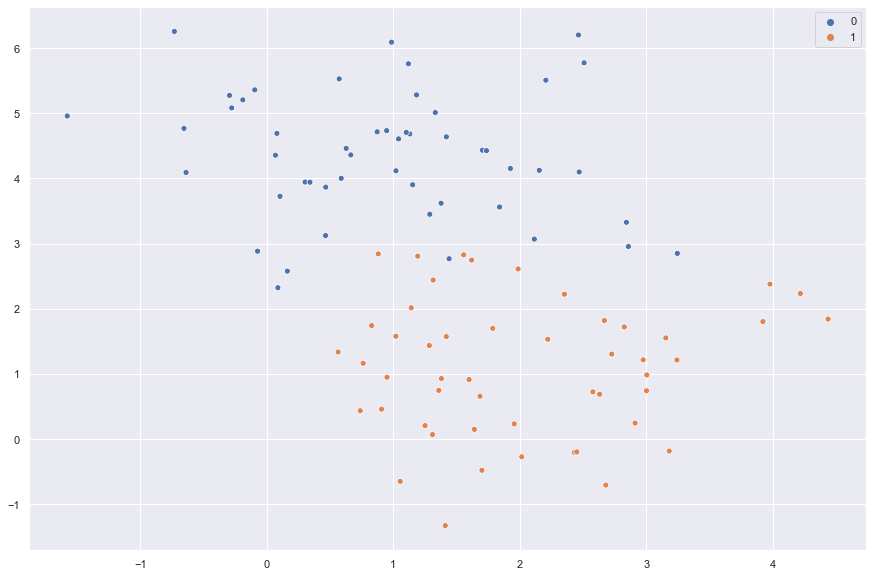

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, ax = ax)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = y)
lr = LogisticRegression(eta = 0.01, epochs = 50)
lr.fit(X_train, y_train)

print("Train set: \n")
print(classification_report(lr.predict(X_train), y_train))

print("Test set: \n")
print(classification_report(lr.predict(X_test), y_test))

Train set: 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.88      0.92      0.90        38

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

Test set: 

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

